<a href="https://colab.research.google.com/github/tantiboro/vaki/blob/main/kiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/New Folder/loans_lenders.csv')

In [ ]:
#df.isnull().sum()

In [ ]:
#df.info()

In [2]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/New Folder/loans.csv')

In [3]:
#Check the status of all the loans
df['STATUS'].value_counts()

funded         1977543
expired          92411
refunded          9182
fundRaising       7564
Name: STATUS, dtype: int64

In [4]:
# Drop the loans that are still on fundraising stage
data = df.loc[df['STATUS'] != 'fundRaising']
data.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,202058,Irene,English,"Irene P. is from the village of Upper Centro,T...",NaN,1100.0,1100.0,funded,541043.0,NaN,General Store,Retail,to purchase additional inventory and working c...,PH,Philippines,"Tudela-Upper Centro, Tudela,Misamis Occidental",shared,0.2,PHP,126.0,2010-05-20 08:40:17.000 +0000,NaN,2010-04-30 07:00:00.000 +0000,2010-06-30 16:09:20.000 +0000,19.0,40,2,1,NaN,Irene,female,true,monthly,field_partner
1,932948,Rosa,English,Rosa works hard to support her family. Rosa is...,Rosa works hard to support her family. Rosa is...,125.0,125.0,funded,1956738.0,NaN,General Store,Retail,to buy more groceries to sell in her general s...,PH,Philippines,"Calatrava, Negros Occidental",shared,0.1,PHP,145.0,2015-08-16 14:03:48.000 +0000,2015-09-17 22:20:02.000 +0000,2015-07-17 07:00:00.000 +0000,2015-08-19 01:22:29.000 +0000,8.0,5,1,1,NaN,Rosa,female,true,monthly,field_partner
2,1159746,Warlita,English,Warlita is a widowed woman with two children. ...,Warlita is a widowed woman with two children. ...,175.0,175.0,funded,2321392.0,NaN,Fruits & Vegetables,Food,to buy more bananas to sell and other supplies...,PH,Philippines,Sogod Leyte,shared,0.1,PHP,145.0,2016-09-28 13:37:22.000 +0000,2016-11-04 22:30:05.000 +0000,2016-08-30 07:00:00.000 +0000,2016-10-06 16:34:29.000 +0000,11.0,7,1,1,"#Widowed, #Woman-Owned Business, #Elderly",Warlita,female,true,monthly,field_partner
3,1396016,FAAFOFOLA,English,Faafofola is a 40-year-old married woman with ...,Faafofola is a 40-year-old married woman with ...,1400.0,1400.0,funded,2661688.0,NaN,Farming,Agriculture,"to buy more taro roots (seedlings), more banan...",WS,Samoa,Moataa,shared,0.1,WST,15.0,2017-10-16 02:59:44.000 +0000,2017-11-18 20:20:02.000 +0000,2017-10-06 07:00:00.000 +0000,2017-11-17 16:27:29.000 +0000,14.0,34,1,1,"#Trees, #Woman-Owned Business, user_favorite, ...",FAAFOFOLA,female,true,monthly,field_partner
4,521395,Veronique,French,Veronique est une veuve agée de........ avec à...,"Veronique is a widow, …[text missing] years ol...",425.0,425.0,funded,1283652.0,NaN,Liquor Store / Off-License,Food,to increase her stock of various brands of be...,CM,Cameroon,Yaoundé,shared,0.1,XAF,217.0,2013-01-25 10:57:20.000 +0000,2013-02-24 21:30:03.000 +0000,2013-01-11 08:00:00.000 +0000,2013-01-26 12:43:47.000 +0000,15.0,17,1,1,NaN,Veronique,female,true,monthly,field_partner


In [5]:
data['STATUS'].value_counts()

funded      1977543
expired       92411
refunded       9182
Name: STATUS, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079136 entries, 0 to 2086699
Data columns (total 34 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   LOAN_NAME                        object 
 2   ORIGINAL_LANGUAGE                object 
 3   DESCRIPTION                      object 
 4   DESCRIPTION_TRANSLATED           object 
 5   FUNDED_AMOUNT                    float64
 6   LOAN_AMOUNT                      float64
 7   STATUS                           object 
 8   IMAGE_ID                         float64
 9   VIDEO_ID                         float64
 10  ACTIVITY_NAME                    object 
 11  SECTOR_NAME                      object 
 12  LOAN_USE                         object 
 13  COUNTRY_CODE                     object 
 14  COUNTRY_NAME                     object 
 15  TOWN_NAME                        object 
 16  CURRENCY_POLICY                  object 
 17  CURRENCY

In [7]:
data.columns = [i.replace(' ', '_').lower() for i in data.columns]

In [8]:
data.columns

Index(['loan_id', 'loan_name', 'original_language', 'description',
       'description_translated', 'funded_amount', 'loan_amount', 'status',
       'image_id', 'video_id', 'activity_name', 'sector_name', 'loan_use',
       'country_code', 'country_name', 'town_name', 'currency_policy',
       'currency_exchange_coverage_rate', 'currency', 'partner_id',
       'posted_time', 'planned_expiration_time', 'disburse_time',
       'raised_time', 'lender_term', 'num_lenders_total',
       'num_journal_entries', 'num_bulk_entries', 'tags', 'borrower_names',
       'borrower_genders', 'borrower_pictured', 'repayment_interval',
       'distribution_model'],
      dtype='object')

In [9]:
dat = data.copy()

In [10]:
dat['loan_status'] = dat.apply(lambda x: 'funded' if x.status == 'refunded' else x.status, axis=1)

In [11]:
dat.head()

,loan_id,loan_name,original_language,description,description_translated,funded_amount,loan_amount,status,image_id,video_id,activity_name,sector_name,loan_use,country_code,country_name,town_name,currency_policy,currency_exchange_coverage_rate,currency,partner_id,posted_time,planned_expiration_time,disburse_time,raised_time,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries,tags,borrower_names,borrower_genders,borrower_pictured,repayment_interval,distribution_model,loan_status
0,202058,Irene,English,"Irene P. is from the village of Upper Centro,T...",NaN,1100.0,1100.0,funded,541043.0,NaN,General Store,Retail,to purchase additional inventory and working c...,PH,Philippines,"Tudela-Upper Centro, Tudela,Misamis Occidental",shared,0.2,PHP,126.0,2010-05-20 08:40:17.000 +0000,NaN,2010-04-30 07:00:00.000 +0000,2010-06-30 16:09:20.000 +0000,19.0,40,2,1,NaN,Irene,female,true,monthly,field_partner,funded
1,932948,Rosa,English,Rosa works hard to support her family. Rosa is...,Rosa works hard to support her family. Rosa is...,125.0,125.0,funded,1956738.0,NaN,General Store,Retail,to buy more groceries to sell in her general s...,PH,Philippines,"Calatrava, Negros Occidental",shared,0.1,PHP,145.0,2015-08-16 14:03:48.000 +0000,2015-09-17 22:20:02.000 +0000,2015-07-17 07:00:00.000 +0000,2015-08-19 01:22:29.000 +0000,8.0,5,1,1,NaN,Rosa,female,true,monthly,field_partner,funded
2,1159746,Warlita,English,Warlita is a widowed woman with two children. ...,Warlita is a widowed woman with two children. ...,175.0,175.0,funded,2321392.0,NaN,Fruits & Vegetables,Food,to buy more bananas to sell and other supplies...,PH,Philippines,Sogod Leyte,shared,0.1,PHP,145.0,2016-09-28 13:37:22.000 +0000,2016-11-04 22:30:05.000 +0000,2016-08-30 07:00:00.000 +0000,2016-10-06 16:34:29.000 +0000,11.0,7,1,1,"#Widowed, #Woman-Owned Business, #Elderly",Warlita,female,true,monthly,field_partner,funded
3,1396016,FAAFOFOLA,English,Faafofola is a 40-year-old married woman with ...,Faafofola is a 40-year-old married woman with ...,1400.0,1400.0,funded,2661688.0,NaN,Farming,Agriculture,"to buy more taro roots (seedlings), more banan...",WS,Samoa,Moataa,shared,0.1,WST,15.0,2017-10-16 02:59:44.000 +0000,2017-11-18 20:20:02.000 +0000,2017-10-06 07:00:00.000 +0000,2017-11-17 16:27:29.000 +0000,14.0,34,1,1,"#Trees, #Woman-Owned Business, user_favorite, ...",FAAFOFOLA,female,true,monthly,field_partner,funded
4,521395,Veronique,French,Veronique est une veuve agée de........ avec à...,"Veronique is a widow, …[text missing] years ol...",425.0,425.0,funded,1283652.0,NaN,Liquor Store / Off-License,Food,to increase her stock of various brands of be...,CM,Cameroon,Yaoundé,shared,0.1,XAF,217.0,2013-01-25 10:57:20.000 +0000,2013-02-24 21:30:03.000 +0000,2013-01-11 08:00:00.000 +0000,2013-01-26 12:43:47.000 +0000,15.0,17,1,1,NaN,Veronique,female,true,monthly,field_partner,funded


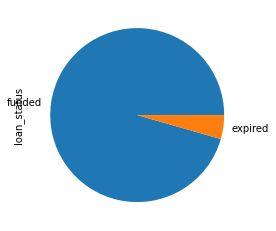

In [12]:
dat['loan_status'].value_counts().plot(kind='pie')

In [17]:
dat['sector_name'].value_counts()

Agriculture       537842
Food              458204
Retail            398742
Services          141483
Clothing          111635
Housing           106530
Personal Use       80240
Education          73129
Transportation     49508
Arts               41584
Health             29638
Construction       24724
Manufacturing      20676
Entertainment       2624
Wholesale           2577
Name: sector_name, dtype: int64

In [22]:
dat[['loan_amount', 'funded_amount', 'sector_name', 'loan_status']].groupby(['sector_name', 'loan_status']).count()

loan_amount  funded_amount
sector_name    loan_status                            
Agriculture    expired            24956          24956
               funded            512886         512886
Arts           expired              277            277
               funded             41307          41307
Clothing       expired             5937           5937
               funded            105698         105698
Construction   expired              801            801
               funded             23923          23923
Education      expired              991            991
               funded             72138          72138
Entertainment  expired              182            182
               funded              2442           2442
Food           expired            16232          16232
               funded            441972         441972
Health         expired             1837           1837
               funded             27801          27801
Housing        expired             6929           6929
               funded             99601          99601
Manufacturing  expired               35             35
               funded             20641          20641
Personal Use   expired             2227           2227
               funded             78013          78013
Retail         expired            20436          20436
               funded            378306         378306
Services       expired             7555           7555
               funded            133928         133928
Transportation expired             3944           3944
               funded             45564          45564
Wholesale      expired               72             72
               funded              2505           2505

In [15]:
dat.groupby('loan_status').mean()

,loan_id,funded_amount,loan_amount,image_id,video_id,currency_exchange_coverage_rate,partner_id,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries
loan_status,,,,,,,,,,,
expired,1.212499e+06,623.285702,1459.180455,2.360417e+06,3879.597484,0.100243,173.607515,18.267755,16.158726,1.016275,1.000768
funded,1.051751e+06,783.177813,785.271125,2.097029e+06,3022.999017,0.106252,168.337626,12.876386,21.628300,1.567216,1.154725


In [ ]:
[ 'loan_name', 'original_language', 'description',
       'description_translated', 'funded_amount', 'loan_amount', 'status',
        'activity_name', 'sector_name', 'loan_use', 'country_name', 'currency_policy',
       'currency_exchange_coverage_rate', 'currency', 'partner_id',
       'posted_time', 'planned_expiration_time', 'disburse_time',
       'raised_time', 'lender_term', 'num_lenders_total',
       'num_journal_entries', 'num_bulk_entries', 'tags', 'borrower_names',
       'borrower_genders', 'borrower_pictured', 'repayment_interval',
       'distribution_model'

In [ ]:
# Create a new column to calculate the average contribution by lenders
dat['contrib_per_lend'] = data['funded_amount'] / data['num_lenders_total']
dat['contrib_per_lend'].value_counts()

25.000000     356709
33.333333      58184
31.250000      47823
37.500000      42240
50.000000      40844
               ...  
197.000000         1
103.773585         1
72.649573          1
37.740385          1
25.164474          1
Name: contrib_per_lend, Length: 19519, dtype: int64

In [ ]:
#Create a new column for the average monthly repayment
dat['monthly_repayment'] = data['funded_amount'] / data['lender_term']
dat['monthly_repayment'].value_counts()

25.000000      82979
50.000000      47977
35.714286      43187
21.428571      39369
37.500000      36875
               ...  
622.727273         1
26.111111          1
48.571429          1
167.592593         1
2208.333333        1
Name: repayment_monthly, Length: 7039, dtype: int64

In [ ]:
#Dropping the columns that are not necessary for the model
data_reduced = dat.drop(columns=['loan_id', 'country_code', 'image_id', 'video_id', 'num_lenders_total', 'description_translated'])

NameError: ignored

In [ ]:
data_reduced.describe(include=object)

,loan_name,original_language,description,status,activity_name,sector_name,loan_use,country_name,town_name,currency_policy,currency,posted_time,planned_expiration_time,disburse_time,raised_time,tags,borrower_names,borrower_genders,borrower_pictured,repayment_interval,distribution_model
count,1936894,1940851,1940823,1977543,1977543,1977543,1940834,1977543,1819103,1977543,1977543,1977543,1610102,1977527,1977543,1056645,1936894,1940851,1940851,1977543,1977543
unique,444006,8,1936715,1,163,15,1177192,97,27976,2,78,1970459,854188,78380,1628575,203835,589032,23774,7734,3,2
top,Anonymous Group,English,"Hello Kiva Community! <br /><br />Meet Mary, w...",funded,Farming,Agriculture,to build a sanitary toilet for her family,Philippines,Kaduna,shared,PHP,2006-04-16 07:10:50.000 +0000,2018-07-20 05:35:51.000 +0000,2020-01-28 08:00:00.000 +0000,2005-03-31 06:27:55.000 +0000,user_favorite,Mary,female,true,monthly,field_partner
freq,7082,1347026,17,1977543,211372,510693,18117,437345,17178,1522902,437343,205,27,4451,202,75473,5794,1298469,1674182,1711871,1960373


In [ ]:
data_reduced.describe()

,funded_amount,loan_amount,currency_exchange_coverage_rate,partner_id,lender_term,num_journal_entries,num_bulk_entries,contrib_per_lend,repayment_monthly
count,1.977543e+06,1.977543e+06,1.522902e+06,1.960373e+06,1.977521e+06,1.977543e+06,1.977543e+06,1.977543e+06,1.977521e+06
mean,7.837110e+02,7.837111e+02,1.061842e-01,1.683680e+02,1.287206e+01,1.567482e+00,1.155112e+00,5.550396e+01,7.198233e+01
std,1.618479e+03,1.618479e+03,4.094721e-02,1.077789e+02,7.146057e+00,1.104296e+00,5.336206e-01,1.616493e+02,1.404544e+02
min,2.500000e+01,2.500000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,2.906977e-01
25%,2.500000e+02,2.500000e+02,1.000000e-01,1.100000e+02,8.000000e+00,1.000000e+00,1.000000e+00,2.678571e+01,2.500000e+01
50%,5.000000e+02,5.000000e+02,1.000000e-01,1.450000e+02,1.200000e+01,1.000000e+00,1.000000e+00,3.095238e+01,3.928571e+01
75%,9.000000e+02,9.000000e+02,1.000000e-01,1.880000e+02,1.400000e+01,2.000000e+00,1.000000e+00,4.070185e+01,7.000000e+01
max,5.000000e+05,5.000000e+05,2.000000e-01,6.190000e+02,1.560000e+02,1.260000e+02,6.300000e+01,2.500000e+04,5.000000e+04


In [ ]:
# import seaborn as sns
# sns.pairplot(df1[['contrib_per_lend', 'repayment_monthly']])

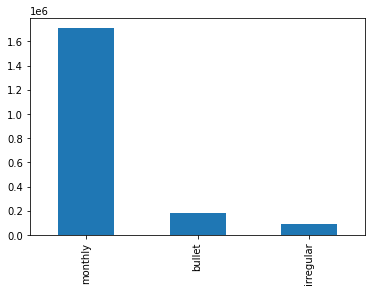

In [ ]:
data_reduced['repayment_interval'].value_counts().plot(kind='bar')

In [ ]:
data_reduced.columns

Index(['loan_name', 'original_language', 'description', 'funded_amount',
       'loan_amount', 'status', 'activity_name', 'sector_name', 'loan_use',
       'country_name', 'town_name', 'currency_policy',
       'currency_exchange_coverage_rate', 'currency', 'partner_id',
       'posted_time', 'planned_expiration_time', 'disburse_time',
       'raised_time', 'lender_term', 'num_journal_entries', 'num_bulk_entries',
       'tags', 'borrower_names', 'borrower_genders', 'borrower_pictured',
       'repayment_interval', 'distribution_model', 'contrib_per_lend',
       'repayment_monthly'],
      dtype='object')

In [ ]:
#data_reduced.columns = [i.replace(' ', '_').lower() for i in df1.columns]

In [ ]:
data_reduced.isnull().sum()

loan_name                           40649
original_language                   36692
description                         36720
funded_amount                           0
loan_amount                             0
status                                  0
activity_name                           0
sector_name                             0
loan_use                            36709
country_name                            0
town_name                          158440
currency_policy                         0
currency_exchange_coverage_rate    454641
currency                                0
partner_id                          17170
posted_time                             0
planned_expiration_time            367441
disburse_time                          16
raised_time                             0
lender_term                            22
num_journal_entries                     0
num_bulk_entries                        0
tags                               920898
borrower_names                    

In [ ]:
data_reduced.loan_amount.value_counts()

200.0       97556
300.0       91475
500.0       84737
250.0       76575
225.0       74493
            ...  
13650.0         1
417775.0        1
13575.0         1
13500.0         1
30100.0         1
Name: loan_amount, Length: 614, dtype: int64

In [ ]:
data_reduced.funded_amount.value_counts()

200.0       97556
300.0       91475
500.0       84736
250.0       76575
225.0       74493
            ...  
13650.0         1
417775.0        1
13575.0         1
13500.0         1
30100.0         1
Name: funded_amount, Length: 614, dtype: int64

In [ ]:
data_reduced['status'].value_counts()

funded    1977543
Name: status, dtype: int64

In [ ]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1977543 entries, 0 to 2086698
Data columns (total 30 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   loan_name                        object 
 1   original_language                object 
 2   description                      object 
 3   funded_amount                    float64
 4   loan_amount                      float64
 5   status                           object 
 6   activity_name                    object 
 7   sector_name                      object 
 8   loan_use                         object 
 9   country_name                     object 
 10  town_name                        object 
 11  currency_policy                  object 
 12  currency_exchange_coverage_rate  float64
 13  currency                         object 
 14  partner_id                       float64
 15  posted_time                      object 
 16  planned_expiration_time          object 
 17  disburse

In [ ]:
data_reduced.repayment_interval.value_counts()

monthly      1711871
bullet        178411
irregular      87261
Name: repayment_interval, dtype: int64

In [ ]:
data_reduced.lender_term.value_counts()

14.0     493431
8.0      403625
7.0      123175
11.0     119797
6.0       98876
          ...  
154.0         1
156.0         1
128.0         1
103.0         1
119.0         1
Name: lender_term, Length: 151, dtype: int64

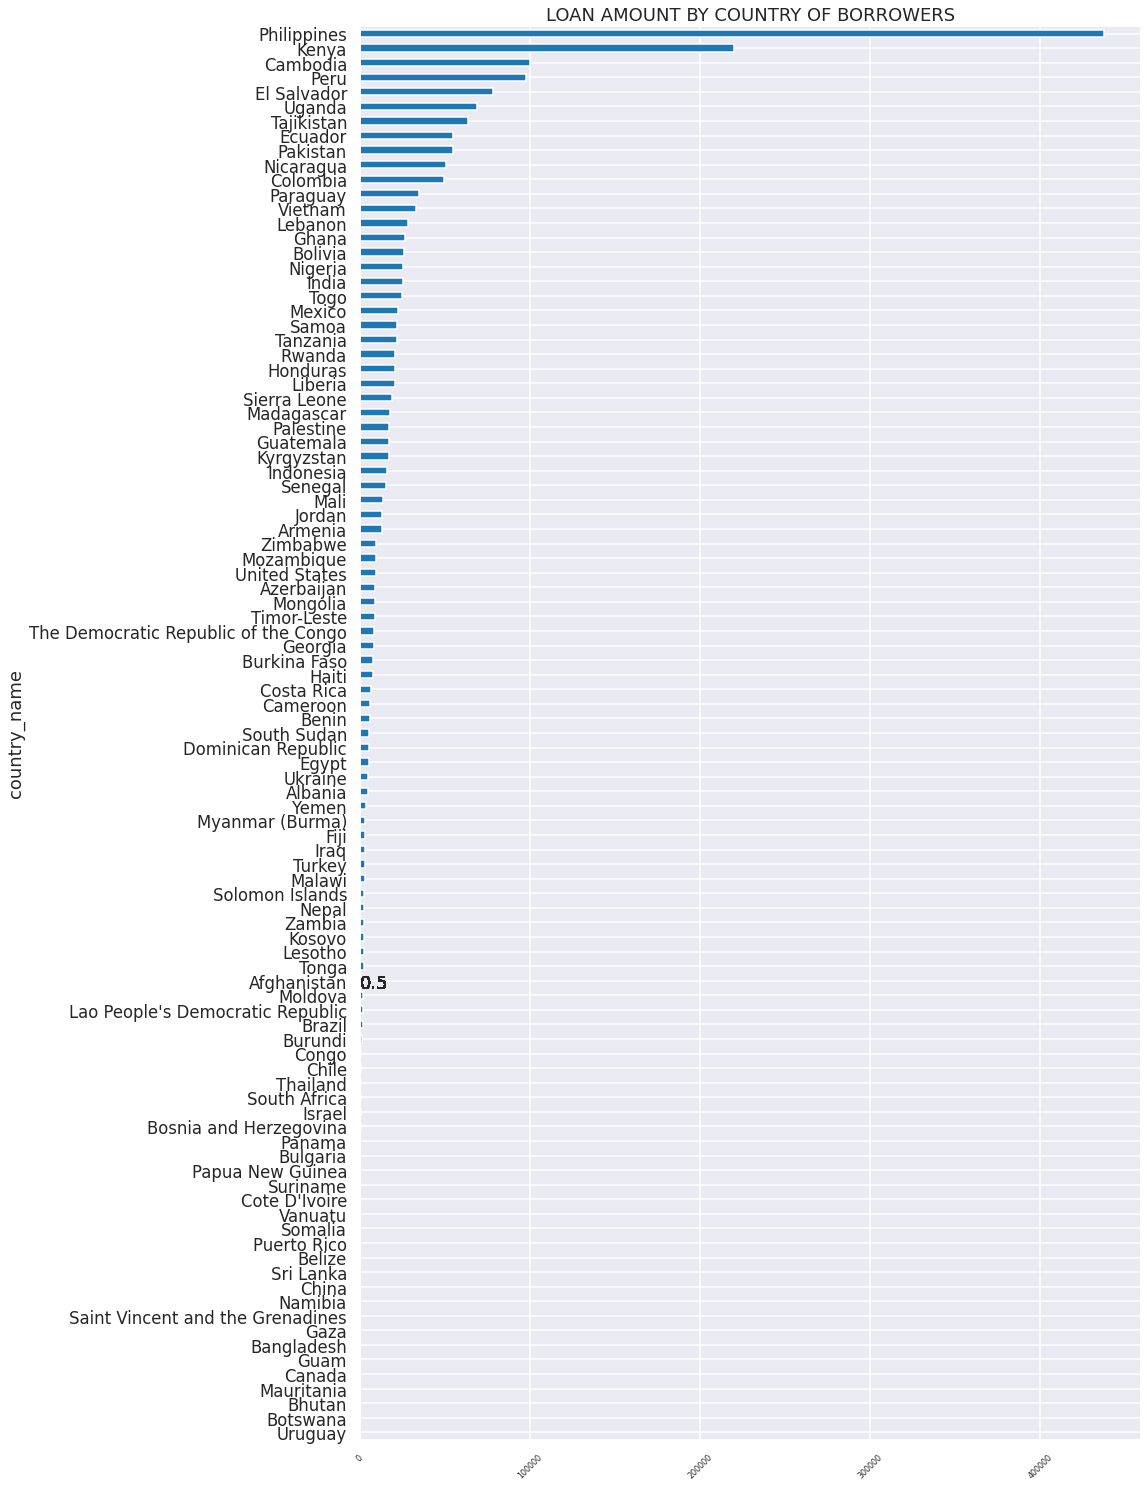

In [ ]:
#loans
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(14,26))
df_sorted = data_reduced.groupby('country_name')['loan_amount'].count().sort_values()
ax = df_sorted.plot.barh()
#ax = df1.groupby('COUNTRY_CODE')['LOAN_AMOUNT'].count().plot.barh()
plt.title('LOAN AMOUNT BY COUNTRY OF BORROWERS')
plt.xticks(fontsize = 8,rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))


In [ ]:
data_num = data_reduced[['funded_amount', 'loan_amount', 'currency_exchange_coverage_rate', 'partner_id', 'lender_term', 'contrib_per_lend', 'repayment_monthly', 'num_journal_entries', 'num_bulk_entries']]


In [ ]:
def ames_eda(data_num): 
    eda_df = {}
    eda_df['null_sum'] = data_num.isnull().sum()
    eda_df['null_pct'] = data_num.isnull().mean()
    eda_df['dtypes'] = data_num.dtypes
    eda_df['count'] = data_num.count()
    eda_df['mean'] = data_num.mean()
    eda_df['median'] = data_num.median()
    eda_df['min'] = data_num.min()
    eda_df['max'] = data_num.max()
    
    return pd.DataFrame(eda_df)
ames_eda(data_num)

,null_sum,null_pct,dtypes,count,mean,median,min,max
funded_amount,0,0.000000,float64,1977543,783.710961,500.000000,25.000000,500000.0
loan_amount,0,0.000000,float64,1977543,783.711100,500.000000,25.000000,500000.0
currency_exchange_coverage_rate,454641,0.229902,float64,1522902,0.106184,0.100000,0.000000,0.2
partner_id,17170,0.008682,float64,1960373,168.367960,145.000000,1.000000,619.0
lender_term,22,0.000011,float64,1977521,12.872059,12.000000,1.000000,156.0
contrib_per_lend,0,0.000000,float64,1977543,55.503955,30.952381,5.000000,25000.0
repayment_monthly,22,0.000011,float64,1977521,71.982333,39.285714,0.290698,50000.0
num_journal_entries,0,0.000000,int64,1977543,1.567482,1.000000,1.000000,126.0
num_bulk_entries,0,0.000000,int64,1977543,1.155112,1.000000,1.000000,63.0


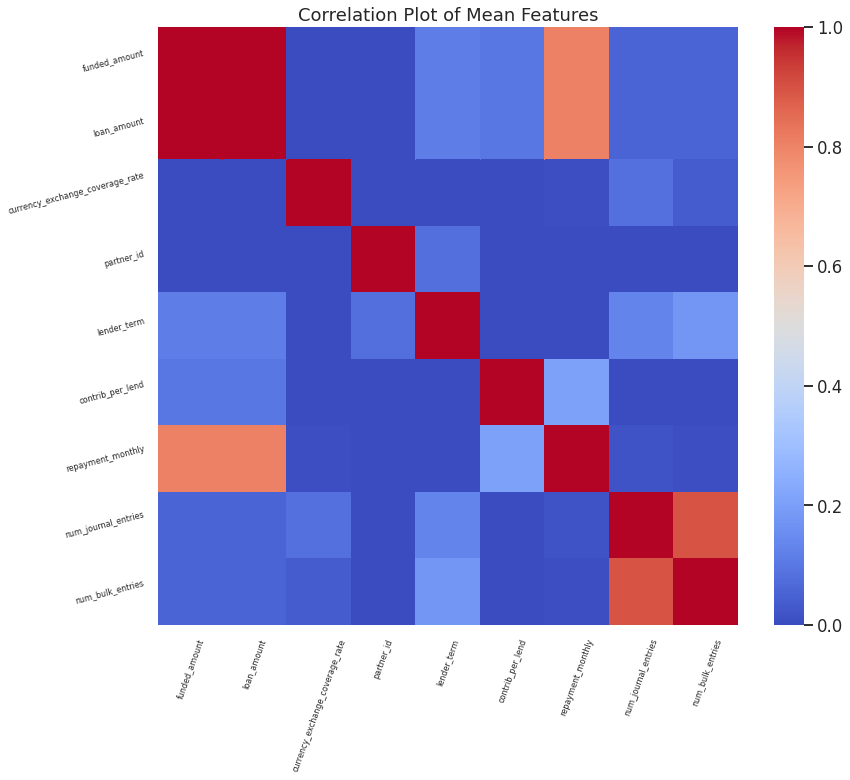

In [ ]:
mean_corr = data_num.corr()
fig=plt.figure(figsize=(13,11))
g1 = sns.heatmap(mean_corr, cmap='coolwarm', vmin=0, vmax=1)
g1.set_xticklabels(g1.get_xticklabels(), rotation=70, fontsize=8)
g1.set_yticklabels(g1.get_yticklabels(), rotation=15, fontsize=8)
plt.title("Correlation Plot of Mean Features")
plt.savefig("Corr_Mean_Features.png", dpi=200)
plt.show()

In [ ]:
attributes = ['funded_amount', 'loan_amount', 'currency_exchange_coverage_rate', 'partner_id', 'lender_term',
               'num_lenders_total', 'num_journal_entries', 'num_bulk_entries']
def histograms_numeric_columns(df1_num, attributes):
    '''
    Takes df, numerical columns as list
    Returns a group of histagrams
    '''
    f = pd.melt(df1_num, value_vars=attributes) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=2, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

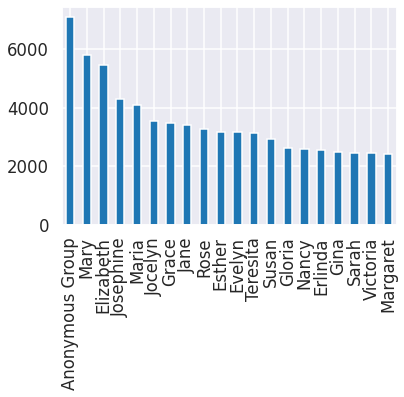

In [ ]:
d = data_reduced['loan_name'].value_counts()[0:20]
d.plot(kind='bar')

In [ ]:
#Create a new column that shows the repayment status( 1 = irregular payment and 0 = payment on time)
data_reduced['repayment_status'] = data_reduced.apply(lambda x: 1 if x['repayment_interval'] =='irregular' else 0, axis=1)

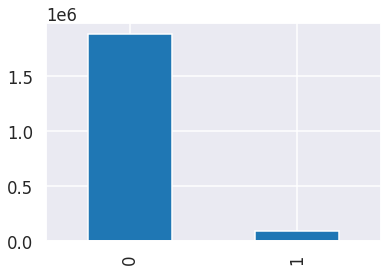

In [ ]:
data_reduced['repayment_status'].value_counts().plot(kind='bar')

In [ ]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1977543 entries, 0 to 2086698
Data columns (total 31 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   loan_name                        object 
 1   original_language                object 
 2   description                      object 
 3   funded_amount                    float64
 4   loan_amount                      float64
 5   status                           object 
 6   activity_name                    object 
 7   sector_name                      object 
 8   loan_use                         object 
 9   country_name                     object 
 10  town_name                        object 
 11  currency_policy                  object 
 12  currency_exchange_coverage_rate  float64
 13  currency                         object 
 14  partner_id                       float64
 15  posted_time                      object 
 16  planned_expiration_time          object 
 17  disburse

In [ ]:
data_clean = data_reduced[['loan_name', 'funded_amount','loan_amount','currency_exchange_coverage_rate', 'partner_id','lender_term', 'num_journal_entries', 'num_bulk_entries', 'contrib_per_lend','repayment_monthly', 'repayment_status']]


In [ ]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [ ]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objects as go
#df_stocks = px.data.stocks()
px.line(data_reduced, x='raised_time', y='loan_amount')

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/New Folder/lenders.csv')
df2.head()

,PERMANENT_NAME,DISPLAY_NAME,MAIN_PIC_ID,CITY,STATE,COUNTRY_CODE,MEMBER_SINCE,PERSONAL_URL,OCCUPATION,LOAN_BECAUSE,OTHER_INFO,LOAN_PURCHASE_NUM,INVITED_BY,NUM_INVITED
0,julie70699492,Julie,NaN,NaN,NaN,NaN,1613601597,NaN,NaN,NaN,NaN,1,NaN,0
1,milo6882,Milo Re,NaN,NaN,NaN,NaN,1614018683,NaN,NaN,NaN,NaN,1,NaN,0
2,dionysios2219,dionysios,NaN,NaN,NaN,NaN,1613694450,NaN,NaN,NaN,NaN,1,NaN,0
3,simon85818350,Simon Re,NaN,NaN,NaN,NaN,1614018664,NaN,NaN,NaN,NaN,1,NaN,0
4,miky1853,Miky,NaN,NaN,NaN,NaN,1613595408,NaN,NaN,NaN,NaN,1,NaN,0


In [ ]:
df2.isnull().sum()

PERMANENT_NAME             0
DISPLAY_NAME            1596
MAIN_PIC_ID          1044640
CITY                 1016056
STATE                1051403
COUNTRY_CODE          894070
MEMBER_SINCE               0
PERSONAL_URL         1512517
OCCUPATION           1224118
LOAN_BECAUSE         1409167
OTHER_INFO           1473473
LOAN_PURCHASE_NUM          0
INVITED_BY           1145612
NUM_INVITED                0
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561255 entries, 0 to 1561254
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   PERMANENT_NAME     1561255 non-null  object 
 1   DISPLAY_NAME       1559659 non-null  object 
 2   MAIN_PIC_ID        516615 non-null   float64
 3   CITY               545199 non-null   object 
 4   STATE              509852 non-null   object 
 5   COUNTRY_CODE       667185 non-null   object 
 6   MEMBER_SINCE       1561255 non-null  int64  
 7   PERSONAL_URL       48738 non-null    object 
 8   OCCUPATION         337137 non-null   object 
 9   LOAN_BECAUSE       152088 non-null   object 
 10  OTHER_INFO         87782 non-null    object 
 11  LOAN_PURCHASE_NUM  1561255 non-null  int64  
 12  INVITED_BY         415643 non-null   object 
 13  NUM_INVITED        1561255 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 166.8+ MB


In [ ]:
df1['SECTOR_NAME'].value_counts()

Agriculture       541946
Food              459380
Retail            399877
Services          141725
Clothing          111880
Housing           106823
Personal Use       80290
Education          73149
Transportation     49600
Arts               41596
Health             29773
Construction       24767
Manufacturing      20687
Entertainment       2625
Wholesale           2582
Name: SECTOR_NAME, dtype: int64